## **WEEK-6 FRAUD DETECTION USING SOM**
### **By: Shrishti Manju**

In [4]:
!pip install minisom

  Created wheel for minisom: filename=MiniSom-2.2.9-py3-none-any.whl size=8594 sha256=08d821b8e72508f967be8b14c0579b8a31f2017617da620925d2d68475118351
  Stored in directory: /root/.cache/pip/wheels/3d/a1/10/f50b6f4865652eac239a2700de411c3078c27e1318320e494c
Successfully built minisom


### **Importing Libraries** 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from pylab import bone, pcolor, colorbar, plot, show
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data = pd.read_csv("/content/drive/MyDrive/CUREYA INTERNSHIP/WEEK-6/Credit_Card_Applications.csv")
data

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [7]:
data.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [31]:
print('Shape of Dataset : ', data.shape)

Shape of Dataset :  (690, 16)


In [8]:
data.describe()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
count,6.900000e+02,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,1.569047e+07,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,7.150647e+04,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,1.556571e+07,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.563169e+07,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.569016e+07,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.575190e+07,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.581544e+07,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


In [9]:
data.isnull().sum()

CustomerID    0
A1            0
A2            0
A3            0
A4            0
A5            0
A6            0
A7            0
A8            0
A9            0
A10           0
A11           0
A12           0
A13           0
A14           0
Class         0
dtype: int64

### **Visualizing the data**

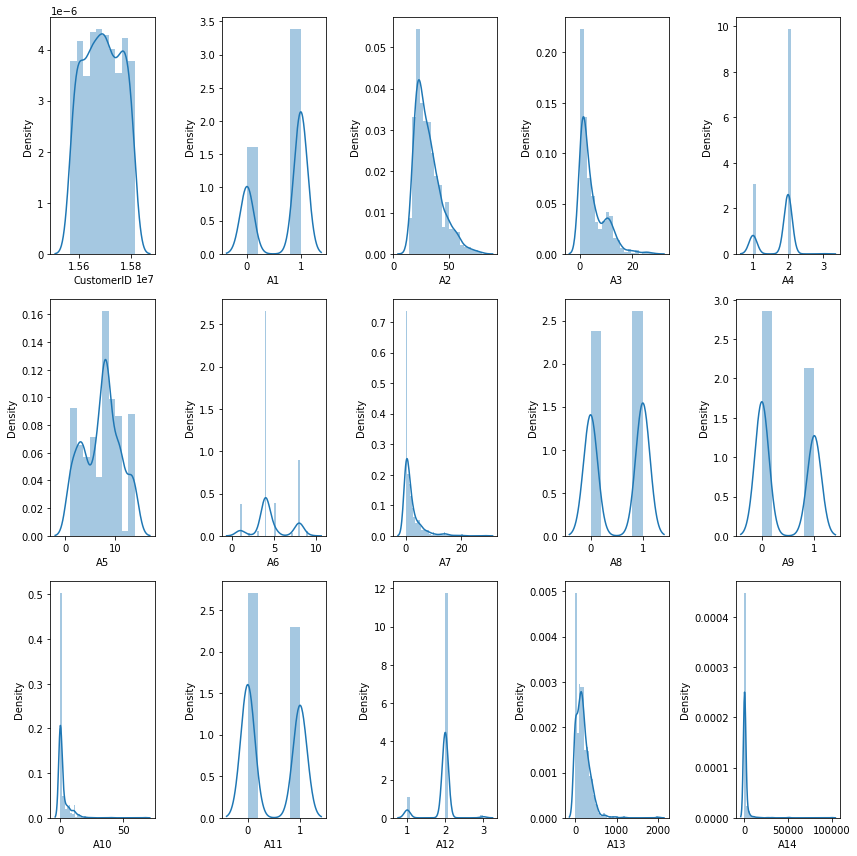

In [10]:
plt.figure(figsize = (12, 12))
plot_no = 1

for column in data:
    if plot_no <= 15:
        ax = plt.subplot(3, 5, plot_no)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 10)
    plot_no += 1
    
plt.tight_layout()
plt.show()

### **Subset of independent and dependent variables**

In [11]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
print("\nValues in X:\n", X)
print("\nValues in y:\n", y)


Values in X:
 [[1.5776156e+07 1.0000000e+00 2.2080000e+01 ... 2.0000000e+00
  1.0000000e+02 1.2130000e+03]
 [1.5739548e+07 0.0000000e+00 2.2670000e+01 ... 2.0000000e+00
  1.6000000e+02 1.0000000e+00]
 [1.5662854e+07 0.0000000e+00 2.9580000e+01 ... 2.0000000e+00
  2.8000000e+02 1.0000000e+00]
 ...
 [1.5675450e+07 0.0000000e+00 1.8830000e+01 ... 2.0000000e+00
  1.0000000e+02 1.0000000e+00]
 [1.5776494e+07 0.0000000e+00 2.7420000e+01 ... 2.0000000e+00
  1.2000000e+02 1.2000000e+01]
 [1.5592412e+07 1.0000000e+00 4.1000000e+01 ... 1.0000000e+00
  5.6000000e+02 1.0000000e+00]]

Values in y:
 [0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1
 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1
 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0
 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0
 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1
 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 

In [12]:
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
print("\nTransformed values of X:\n", X)


Transformed values of X:
 [[8.42681467e-01 1.00000000e+00 1.25263158e-01 ... 5.00000000e-01
  5.00000000e-02 1.21200000e-02]
 [6.96090562e-01 0.00000000e+00 1.34135338e-01 ... 5.00000000e-01
  8.00000000e-02 0.00000000e+00]
 [3.88981656e-01 0.00000000e+00 2.38045113e-01 ... 5.00000000e-01
  1.40000000e-01 0.00000000e+00]
 ...
 [4.39420332e-01 0.00000000e+00 7.63909774e-02 ... 5.00000000e-01
  5.00000000e-02 0.00000000e+00]
 [8.44034934e-01 0.00000000e+00 2.05563910e-01 ... 5.00000000e-01
  6.00000000e-02 1.10000000e-04]
 [1.06907888e-01 1.00000000e+00 4.09774436e-01 ... 0.00000000e+00
  2.80000000e-01 0.00000000e+00]]


In [22]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

### **Visualizing the results obtained**

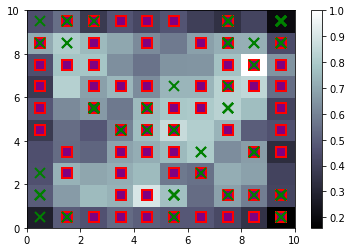

In [36]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['s', 'x']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'Purple',
         markersize = 10,
         markeredgewidth = 2)
show()

In [30]:
mappings = som.win_map(X)
print("\nMappings are:\n", mappings)


Mappings are:
 defaultdict(<class 'list'>, {(6, 6): [array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
       0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.05      , 0.01212   ]), array([0.30921519, 1.        , 0.44240602, 0.17857143, 0.5       ,
       0.15384615, 0.5       , 0.07894737, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.0705    , 0.        ]), array([0.46368263, 1.        , 0.50496241, 0.23214286, 0.5       ,
       0.53846154, 0.375     , 0.03508772, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.        , 0.00228   ]), array([0.57477506, 1.        , 0.14030075, 0.08928571, 0.5       ,
       0.        , 0.        , 0.00298246, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.05      , 0.04208   ]), array([5.45275078e-01, 1.00000000e+00, 5.26315789e-02, 1.07142857e-01,
       5.00000000e-01, 2.30769231e-01, 3.75000000e-01, 1.403508

### **Observations :**

So we got a list of all the customers associated to this WN, i.e all the cheaters.
The values are scaled up so it is difficult to recognize them.

In [32]:
frauds = mappings[(5,2)]
frauds = sc.inverse_transform(frauds)
print("\nFrauds customers are:\n\n",frauds)


Frauds customers are:

 [[1.5737627e+07 1.0000000e+00 1.6170000e+01 4.0000000e-02 2.0000000e+00
  8.0000000e+00 4.0000000e+00 4.0000000e-02 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 0.0000000e+00 1.0000000e+00]
 [1.5766906e+07 1.0000000e+00 2.9830000e+01 3.5000000e+00 2.0000000e+00
  8.0000000e+00 4.0000000e+00 1.6500000e-01 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 2.1600000e+02 1.0000000e+00]
 [1.5798895e+07 1.0000000e+00 3.4080000e+01 2.5000000e+00 2.0000000e+00
  8.0000000e+00 4.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 4.6000000e+02 1.7000000e+01]
 [1.5732884e+07 1.0000000e+00 1.7920000e+01 2.0500000e-01 2.0000000e+00
  6.0000000e+00 4.0000000e+00 4.0000000e-02 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 2.8000000e+02 7.5100000e+02]
 [1.5706637e+07 1.0000000e+00 2.0000000e+01 7.0000000e+00 2.0000000e+00
  8.0000000e+00 4.0000000e+00 5.000

In [33]:
data_frauds = pd.DataFrame(frauds)
data_frauds

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15737627.0,1.0,16.17,0.040,2.0,8.0,4.0,0.040,0.0,0.0,0.0,0.0,2.0,0.0,1.0
1,15766906.0,1.0,29.83,3.500,2.0,8.0,4.0,0.165,0.0,0.0,0.0,0.0,2.0,216.0,1.0
2,15798895.0,1.0,34.08,2.500,2.0,8.0,4.0,1.000,0.0,0.0,0.0,0.0,2.0,460.0,17.0
3,15732884.0,1.0,17.92,0.205,2.0,6.0,4.0,0.040,0.0,0.0,0.0,0.0,2.0,280.0,751.0
4,15706637.0,1.0,20.00,7.000,2.0,8.0,4.0,0.500,0.0,0.0,0.0,0.0,2.0,0.0,1.0
5,15813363.0,1.0,31.00,2.085,2.0,8.0,4.0,0.085,0.0,0.0,0.0,0.0,2.0,300.0,1.0
6,15779492.0,1.0,18.83,0.000,2.0,11.0,4.0,0.665,0.0,0.0,0.0,0.0,2.0,160.0,2.0
7,15742297.0,1.0,25.25,1.000,2.0,6.0,4.0,0.500,0.0,0.0,0.0,0.0,2.0,200.0,1.0
8,15778589.0,1.0,20.42,0.000,2.0,8.0,4.0,0.000,0.0,0.0,0.0,0.0,3.0,184.0,1.0
9,15729377.0,1.0,18.17,10.250,2.0,8.0,8.0,1.085,0.0,0.0,0.0,0.0,2.0,320.0,14.0


### **Observations:**

Customer IDs of the cheaters/fraudsters

In [34]:
customers = data.iloc[:,1:].values
is_fraud = np.zeros(len(data))

for i in range(len(data)):
    if data.iloc[i, 0] in frauds:
        is_fraud[i] = 1

In [35]:
print(is_fraud)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.